In [1]:
import pandas as pd
import numpy as np

In [3]:
car_df = pd.read_csv('kijiji_data_fullset.csv')

In [4]:
car_df.head()

,brand,model,model_year,list_price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,vin_number,image_link,dealer_address
0,Ford,Escape,2022,42368,Silver,SE Hybrid,New,"SUV, Crossover",Other,Automatic,Other,0,NaN,NaN,NaN,"940 Kingston Road, Pickering, ON, L1V 1B3"
1,Acura,TLX,2019,33590,Blue,Tech A-Spec,Used,Sedan,Front-wheel drive (FWD),Automatic,Other,74687,NaN,NaN,NaN,"55 Auction Ln, Brampton, ON, L6T 5V8"
2,Hyundai,Veloster,2012,8995,Silver,GRAND DLX NAVI BLUETOOTH CAMERA PARK ASSIST PA...,Used,Hatchback,Front-wheel drive (FWD),Automatic,Gasoline,171000,https://www.carproof.com/order?ref=kijiji&vin=...,KMHTC6AD8CU025892,NaN,"1830 Lawrence Avenue East, Toronto, ON, M1R 2Y2"
3,Mercedes-Benz,Other,2019,79800,Black,"AMG CLS53 S, 429 HP, DISTRONIC PLUS, AMG PKG,",Used,Sedan,All-wheel drive (AWD),Automatic,Other,77591,https://www.carproof.com/order?ref=kijiji&vin=...,WDD2J6BB1KA029498,NaN,"60 Martin Ross Avenue, Toronto, ON, M3J 2L4"
4,Audi,Q5,2013,18800,Black,2.0L Premium,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,125000,https://www.carproof.com/order?ref=kijiji&vin=...,wa1mfcfp9da004225,NaN,"Blackwater Crescent, Toronto, ON M1B 1L5, Canada"


In [5]:
car_df['brand'].value_counts()

BMW              60
Nissan           54
Honda            47
Audi             39
Toyota           36
Jaguar           28
Mercedes-Benz    26
Chevrolet        25
Other            25
Volvo            23
Cadillac         18
Ford             18
Hyundai          15
Jeep             12
Ram              10
Land Rover        7
Lexus             6
Porsche           6
Dodge             5
Volkswagen        5
Kia               5
Scion             3
Mazda             3
Tesla             2
Maserati          2
Acura             2
Bentley           2
GMC               2
Infiniti          1
Subaru            1
Name: brand, dtype: int64

In [6]:
car_df = car_df.replace('na','0')

In [7]:
# model_year type to int

car_df['model_year'] = pd.to_numeric(car_df['model_year'])

In [9]:
car_df.head()

,brand,model,model_year,list_price,color,configration,condition,body_type,wheel_config,transmission,fuel_type,mileage,carfax_link,vin_number,image_link,dealer_address
0,Ford,Escape,2022,42368,Silver,SE Hybrid,New,"SUV, Crossover",Other,Automatic,Other,0,NaN,NaN,NaN,"940 Kingston Road, Pickering, ON, L1V 1B3"
1,Acura,TLX,2019,33590,Blue,Tech A-Spec,Used,Sedan,Front-wheel drive (FWD),Automatic,Other,74687,NaN,NaN,NaN,"55 Auction Ln, Brampton, ON, L6T 5V8"
2,Hyundai,Veloster,2012,8995,Silver,GRAND DLX NAVI BLUETOOTH CAMERA PARK ASSIST PA...,Used,Hatchback,Front-wheel drive (FWD),Automatic,Gasoline,171000,https://www.carproof.com/order?ref=kijiji&vin=...,KMHTC6AD8CU025892,NaN,"1830 Lawrence Avenue East, Toronto, ON, M1R 2Y2"
3,Mercedes-Benz,Other,2019,79800,Black,"AMG CLS53 S, 429 HP, DISTRONIC PLUS, AMG PKG,",Used,Sedan,All-wheel drive (AWD),Automatic,Other,77591,https://www.carproof.com/order?ref=kijiji&vin=...,WDD2J6BB1KA029498,NaN,"60 Martin Ross Avenue, Toronto, ON, M3J 2L4"
4,Audi,Q5,2013,18800,Black,2.0L Premium,Used,"SUV, Crossover",All-wheel drive (AWD),Automatic,Gasoline,125000,https://www.carproof.com/order?ref=kijiji&vin=...,wa1mfcfp9da004225,NaN,"Blackwater Crescent, Toronto, ON M1B 1L5, Canada"


Plotting the Data

In [10]:
import matplotlib.pyplot as plt

In [11]:
make_count = car_df.groupby('model_year')['brand'].count()
make_count_frame = make_count.to_frame()
make_count_frame.rename(columns={'brand':'total numbers'},inplace=True)
make_count_frame.head()

,total numbers
model_year,
0,0
1992,1
2003,21
2004,1
2006,47


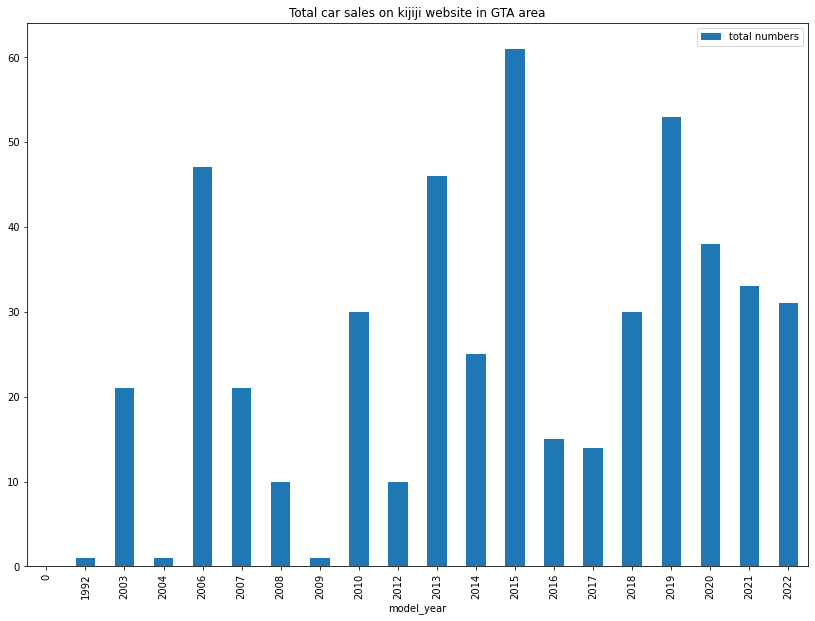

In [12]:
fig = make_count_frame.plot(kind = 'bar',figsize=(14, 10), title = 'Total car sales on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_car_count.png')

In [16]:
brand_count = car_df.groupby('brand')['model_year'].count()
brand_count_df = brand_count.to_frame()
brand_count_df.rename(columns={'model_year':'brand total numbers'},inplace=True)
brand_count_df.head()

,brand total numbers
brand,
Acura,2
Audi,39
BMW,60
Bentley,2
Cadillac,18


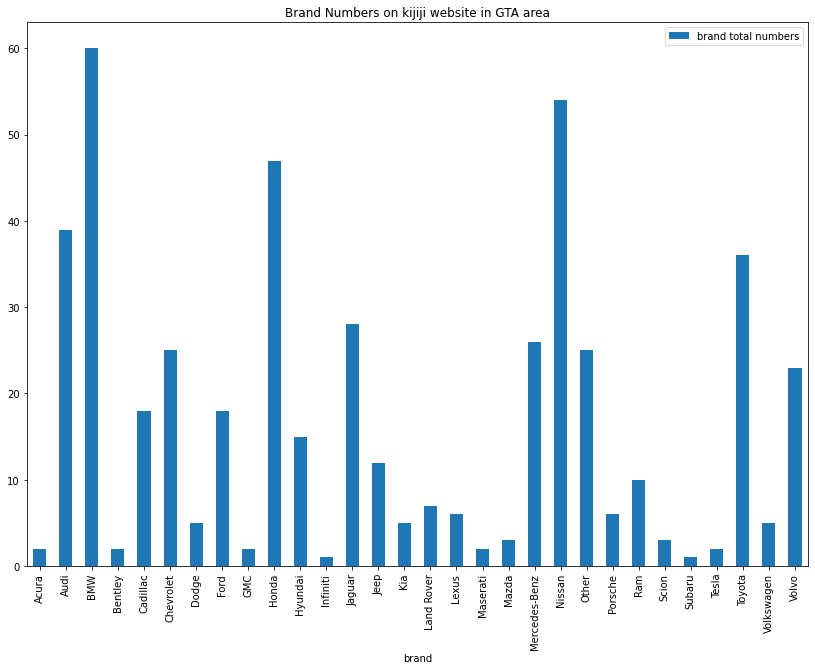

In [17]:
fig = brand_count_df.plot(kind = 'bar',figsize=(14, 10), title = 'Brand Numbers on kijiji website in GTA area').get_figure()
fig.savefig('kijiji_brand_count.png')

In [19]:
df= car_df
mile_price = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["body_type"].unique()):
        z = df[(df["brand"] == b) & (df["body_type"] == v)]["mileage"].mean()
        mile_price = mile_price.append(pd.DataFrame({'brand':b , 'body_type':v , 'avgMileage':z}, index=[0]))
mile_price = mile_price.reset_index()
del mile_price["index"]
mile_price["avgMileage"].fillna(0,inplace=True)
mile_price["avgMileage"].isnull().value_counts()
mile_price["avgMileage"] = mile_price["avgMileage"].astype(int)
mile_price.head(5)

,brand,body_type,avgMileage
0,Ford,"SUV, Crossover",66021
1,Ford,Sedan,34009
2,Ford,Hatchback,0
3,Ford,Coupe (2 door),23000
4,Ford,Pickup Truck,75729


In [20]:
avg_mile = mile_price.groupby('brand')['avgMileage'].mean()
avg_mile_df = avg_mile.to_frame()
avg_mile_df.head()

,avgMileage
brand,
Acura,12834.3
Audi,25494.4
BMW,18762.5
Bentley,3284.7
Cadillac,11315.0


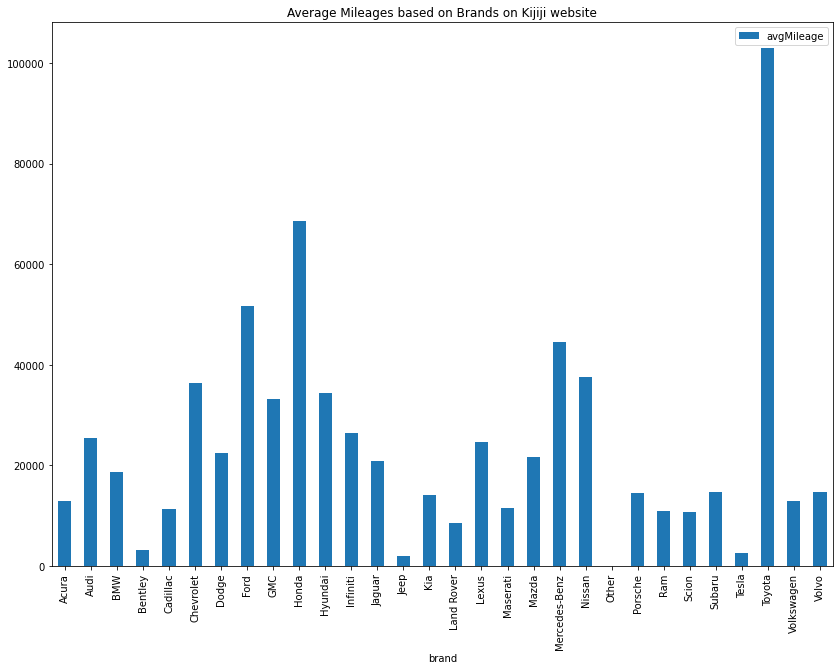

In [21]:
fig = avg_mile_df.plot(kind='bar',figsize=(14, 10), title = 'Average Mileages based on Brands on Kijiji website').get_figure()
fig.savefig('kijiji_average_mileage.png')

In [24]:
df= car_df
model_type = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["body_type"].unique()):
        z = df[(df["brand"] == b) & (df["body_type"] == v)]["list_price"].mean()
        model_type = model_type.append(pd.DataFrame({'brand':b , 'body_type':v , 'avgPrice':z}, index=[0]))
model_type = model_type.reset_index()
del model_type["index"]
model_type["avgPrice"].fillna(0,inplace=True)
model_type["avgPrice"].isnull().value_counts()
model_type["avgPrice"] = model_type["avgPrice"].astype(int)
model_type.head(5)

,brand,body_type,avgPrice
0,Ford,"SUV, Crossover",28128
1,Ford,Sedan,17290
2,Ford,Hatchback,0
3,Ford,Coupe (2 door),54900
4,Ford,Pickup Truck,45743


In [27]:
brand_avg_price = model_type

brand_avg_price = brand_avg_price.groupby('brand')['avgPrice'].mean()
brand_avg_price_df = brand_avg_price.to_frame()
brand_avg_price_df.head()

,avgPrice
brand,
Acura,2054.4
Audi,9265.1
BMW,16513.8
Bentley,12980.0
Cadillac,1558.2


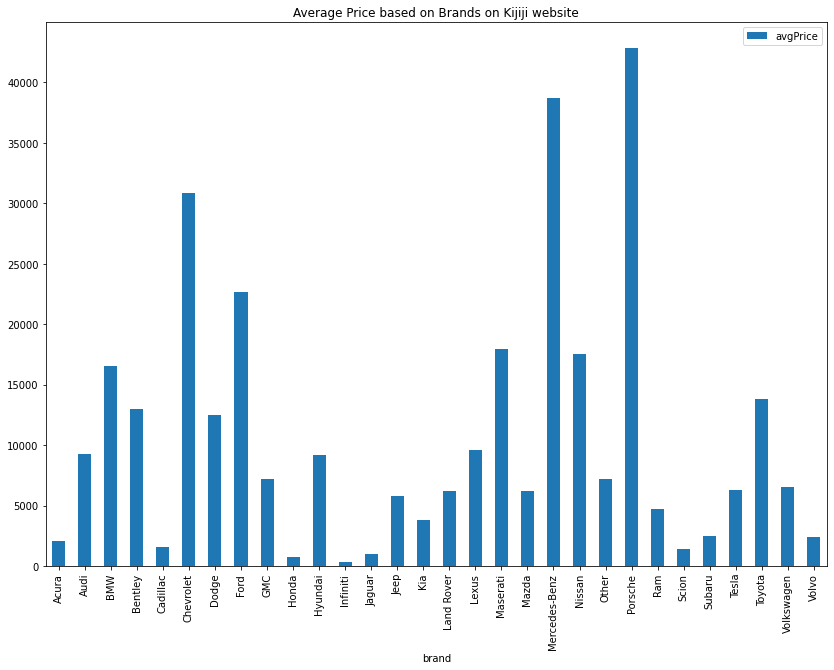

In [28]:
fig = brand_avg_price_df.plot(kind='bar',figsize=(14, 10), title = 'Average Price based on Brands on Kijiji website').get_figure()
fig.savefig('kijiji_average_price.png')